# Run ArchR

Run dimensionality reduction and downstream analyses.

In [1]:
library(ArchR)
library(patchwork)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
set.seed(1)
addArchRThreads(threads = 32) 

Setting default number of Parallel threads to 32.



In [3]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [4]:
ArrowFiles = c('D0.arrow',
               'D2.arrow',
               'D4.arrow',
               'D6.arrow',
               'D8.arrow',
               'D10.arrow',
               'D12.arrow',
               'D14.arrow')
#              'H1.arrow')

In [5]:
proj <- ArchRProject(
  ArrowFiles = paste("/srv/scratch/surag/scATAC-reprog/arrow/", ArrowFiles, sep=''), 
  outputDirectory = "/srv/scratch/surag/scATAC-reprog/arrow/without_iPSC",
  copyArrows = FALSE #This is recommened so that you maintain an unaltered copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [6]:
getAvailableMatrices(proj)

[1] "GeneScoreMatrix" "TileMatrix"

In [7]:
proj <- addIterativeLSI(ArchRProj = proj, iterations = 4, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-14715f4080dcde-Date-2021-07-14_Time-01-26-17.log
If there is an issue, please report to github with logFile!

2021-07-14 01:26:18 : Computing Total Across All Features, 0.004 mins elapsed.

2021-07-14 01:26:23 : Computing Top Features, 0.089 mins elapsed.

###########
2021-07-14 01:26:24 : Running LSI (1 of 4) on Top Features, 0.108 mins elapsed.
###########

2021-07-14 01:26:24 : Sampling Cells (N = 10004) for Estimated LSI, 0.11 mins elapsed.

2021-07-14 01:26:24 : Creating Sampled Partial Matrix, 0.11 mins elapsed.

2021-07-14 01:26:41 : Computing Estimated LSI (projectAll = FALSE), 0.392 mins elapsed.

2021-07-14 01:28:00 : Identifying Clusters, 1.705 mins elapsed.

2021-07-14 01:28:35 : Identified 6 Clusters, 2.289 mins elapsed.

2021-07-14 01:28:35 : Saving LSI Iteration, 2.29 mins elapsed.

2021-07-14 01:28:55 : Creating Cluster Matrix on the total Group Features, 2.621 mins elapsed.

2021-07-14 01:29:08 : Co

In [8]:
proj <- addClusters(input = proj, reducedDims = "IterativeLSI")

ArchR logging to : ArchRLogs/ArchR-addClusters-14715f20510895-Date-2021-07-14_Time-01-36-25.log
If there is an issue, please report to github with logFile!

2021-07-14 01:36:27 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.005 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 79547
Number of edges: 2625694

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8670
Number of communities: 61
Elapsed time: 28 seconds


41 singletons identified. 20 final clusters.

2021-07-14 01:43:04 : Testing Biased Clusters, 6.63 mins elapsed.

2021-07-14 01:43:04 : Testing Outlier Clusters, 6.634 mins elapsed.

2021-07-14 01:43:04 : Assigning Outlier Clusters (n = 1, nOutlier < 5 cells) to Neighbors, 6.634 mins elapsed.

2021-07-14 01:43:04 : Assigning Cluster Names to 19 Clusters, 6.636 mins elapsed.

2021-07-14 01:43:05 : Finished addClusters, 6.639 mins elapsed.



In [9]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI", force=T)

01:43:05 UMAP embedding parameters a = 0.7669 b = 1.223

01:43:05 Read 79547 rows and found 30 numeric columns

01:43:05 Using Annoy for neighbor search, n_neighbors = 40

01:43:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

01:43:20 Writing NN index file to temp file /tmp/RtmpzGtFfO/file14715f751b940b

01:43:20 Searching Annoy index using 28 threads, search_k = 4000

01:43:23 Annoy recall = 100%

01:43:25 Commencing smooth kNN distance calibration using 28 threads

01:43:29 Initializing from normalized Laplacian + noise

01:43:34 Commencing optimization for 200 epochs, with 5180268 positive edges

01:44:34 Optimization finished

01:44:34 Creating temp model dir /tmp/RtmpzGtFfO/dir14715f66dbaefc

01:44:34 Creating dir /tmp/RtmpzGtFfO/dir14715f66dbaefc

01:44:42 Ch

In [10]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-14715f6ccbf245-Date-2021-07-14_Time-01-44-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-14715f6ccbf245-Date-2021-07-14_Time-01-44-43.log



In [11]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-14715f51aa0a31-Date-2021-07-14_Time-01-44-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-14715f51aa0a31-Date-2021-07-14_Time-01-44-46.log



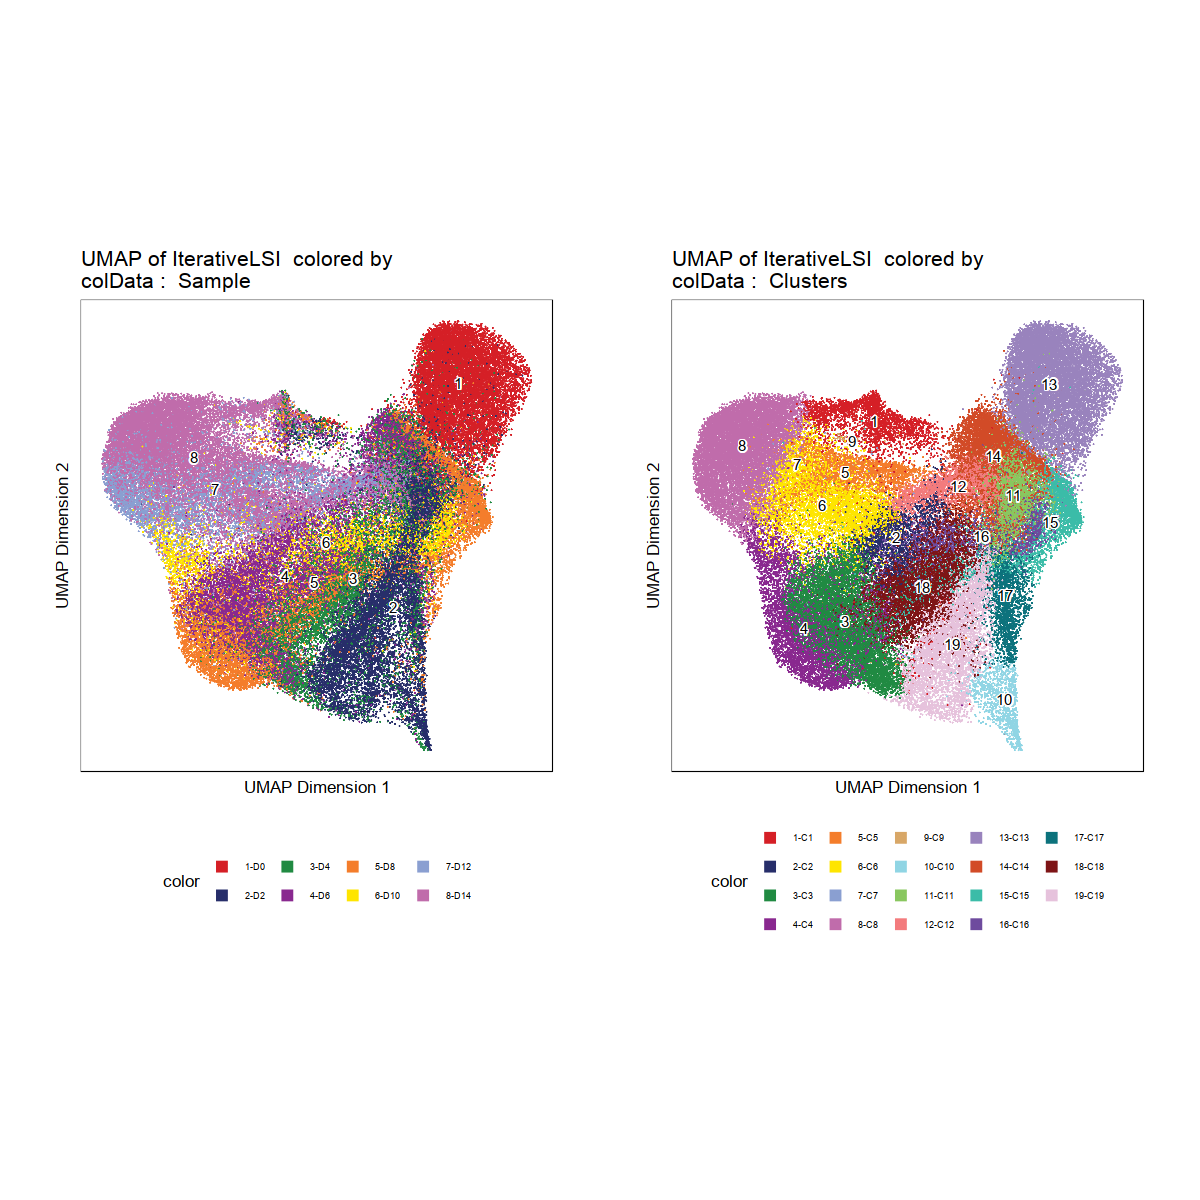

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)

p1 | p2

In [31]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-b4675d05d05c-Date-2020-04-24_Time-21-17-28.log
If there is an issue, please report to github with logFile!

2020-04-24 21:17:29 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [49]:
markerGenes  <- c(
    "BCL2A1"
  )

p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b4675921aff5-Date-2020-04-24_Time-21-25-10.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-04-24 21:25:11 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b4675921aff5-Date-2020-04-24_Time-21-25-10.log



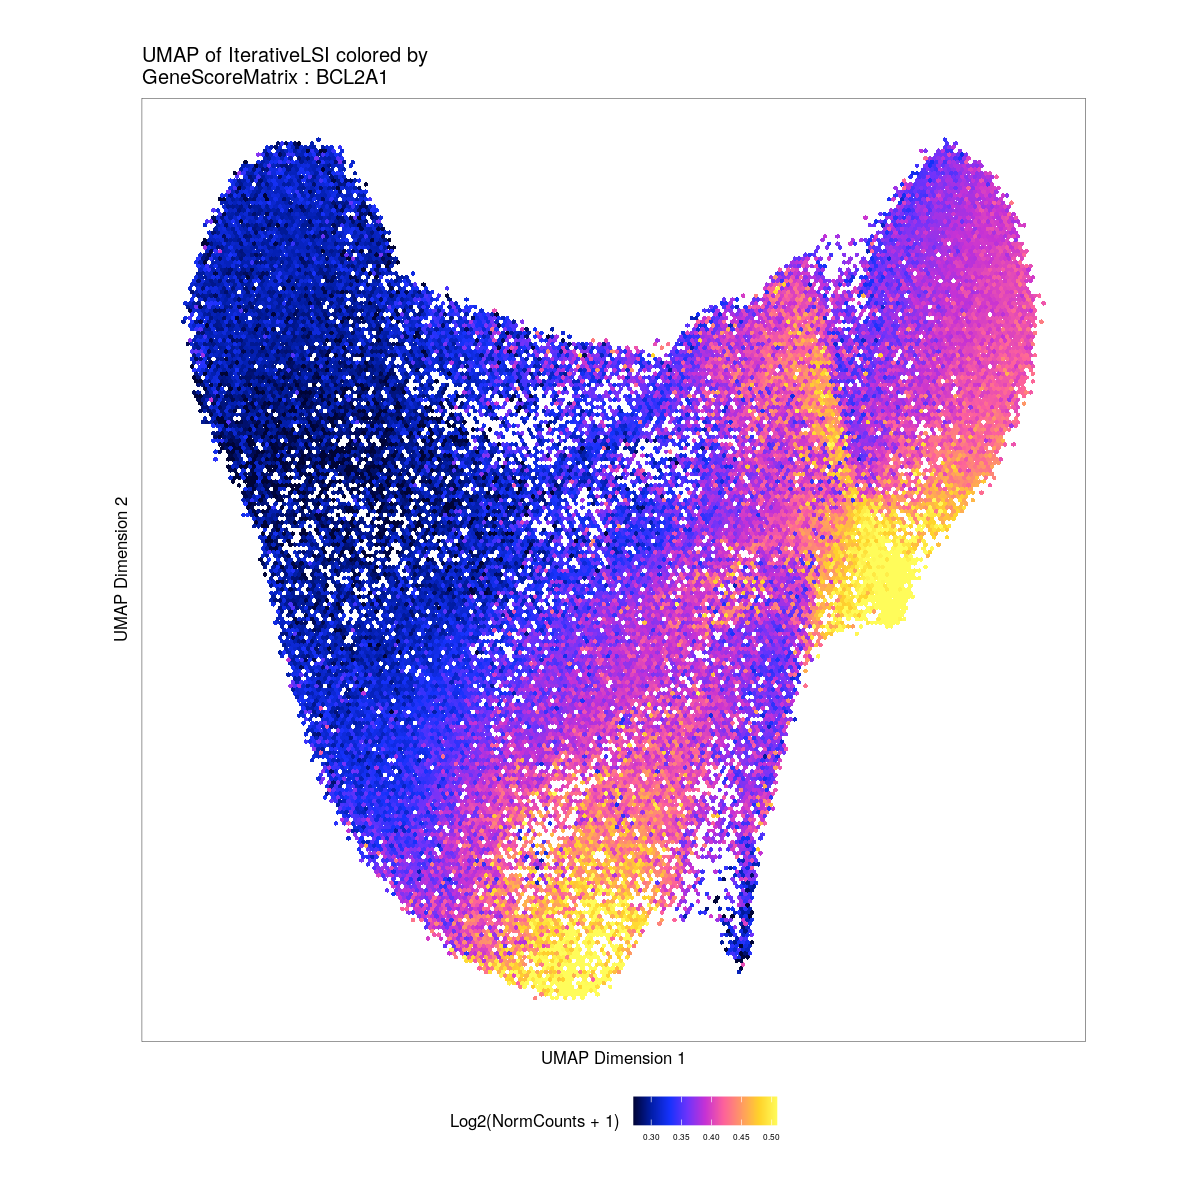

In [50]:
p

In [51]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Clusters", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-b4675d4a2437-Date-2020-04-24_Time-21-25-23.log
If there is an issue, please report to github with logFile!

2020-04-24 21:25:23 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr15 79960889-79971446      - |         597      BCL2A1
  -------
  seqinfo: 24 sequences from hg38 genome


2020-04-24 21:25:23 : Adding Bulk Tracks (1 of 1), 0.009 mins elapsed.

2020-04-24 21:25:26 : Adding Gene Tracks (1 of 1), 0.051 mins elapsed.

2020-04-24 21:25:26 : Plotting, 0.056 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-b4675d4a2437-Date-2020-04-24_Time-21-25-23.log



In [ ]:
chr15:79970195-79972196

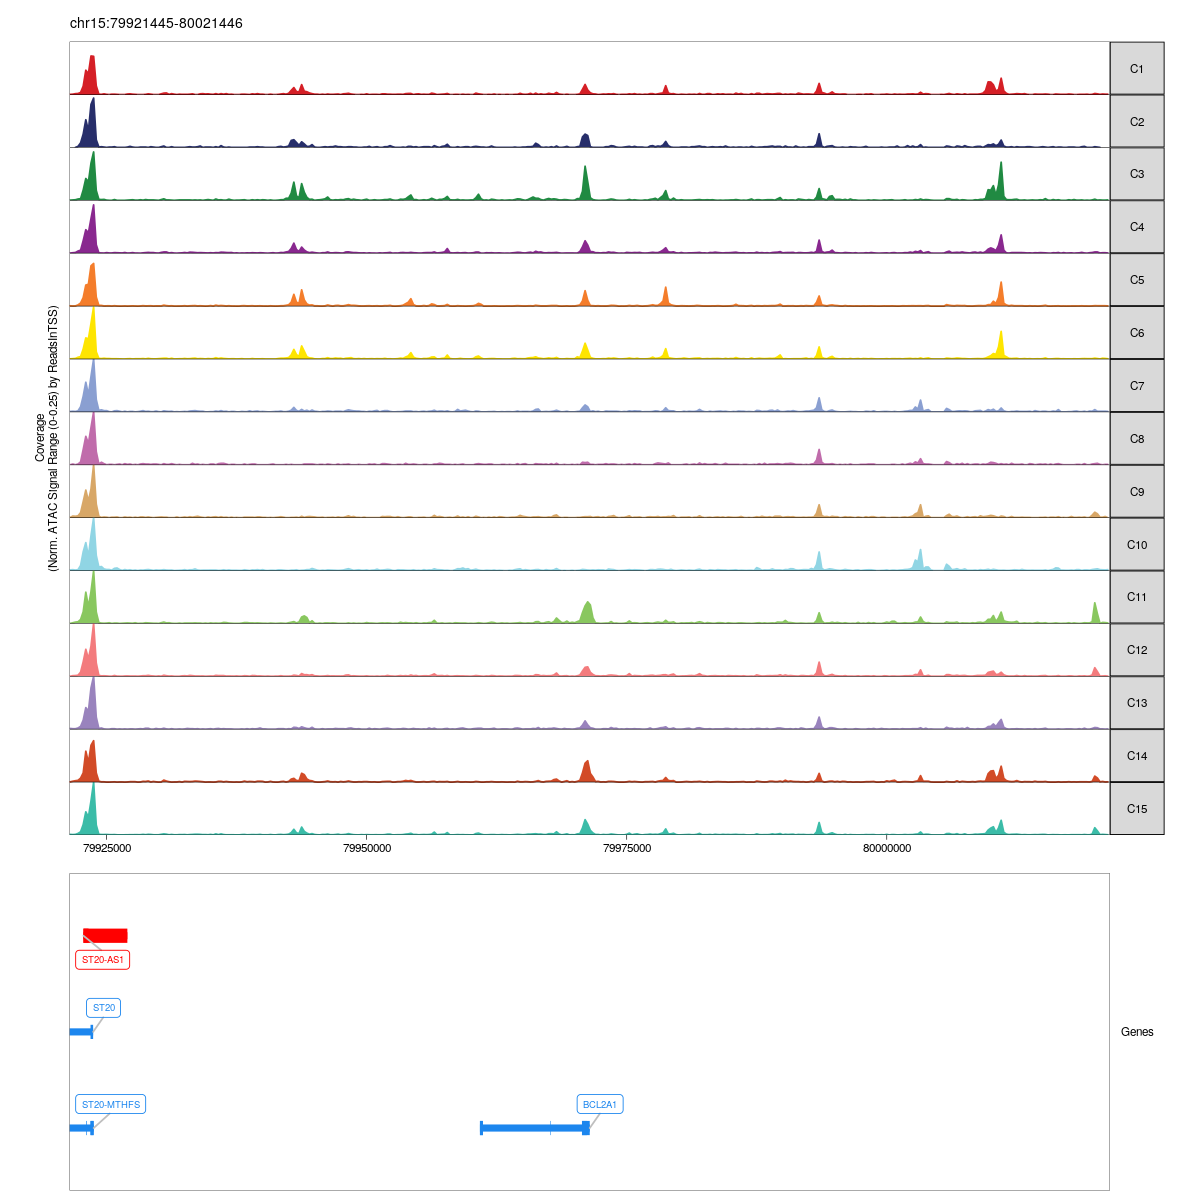

In [52]:
grid::grid.newpage()
grid::grid.draw(p$BCL2A1)

In [72]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                      ggrepel_0.8.2                    
 [3] patchwork_1.0.0                   gridExtra_2.3                    
 [5] uwot_0.1.8                        nabor_0.5.0                      
 [7] Seurat_3.1.5                      BSgen